In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras import regularizers
import keras

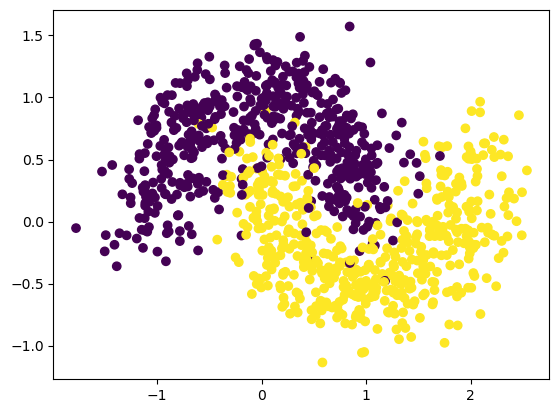

In [2]:
X, y = make_moons(1000,noise=0.25, random_state=2)
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [20]:
def build_model(learning_rate = 0.001, regularizer = None):
    model = Sequential()
    model.add(Dense(32,input_dim=2, kernel_regularizer = regularizer, activation="relu"))
    model.add(Dense(16,  kernel_regularizer = regularizer, activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.summary()

    adam = Adam(learning_rate=learning_rate)

    model.compile(optimizer=adam, metrics=['accuracy'], loss="binary_crossentropy" )

    return model

In [21]:
def plot_loss(model,history, name):
    plt.title(name)
    plt.xlim(-2,3)
    plt.ylim(-1.5,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    plot_decision_regions(X,y.astype('int'), clf=model, legend=2)
    return

In [22]:
def gen_reg_arr(lambda_vals):
    regs = []
    for i in lambda_vals:
        regs.append(regularizers.L1(i))
        regs.append(regularizers.L2(i))
    return regs

In [23]:
learning_rate = [0.01, 0.005, 0.001, 0.0001]
lambda_values = [0.01, 0.001, 0.0001, 0.00001]
regularizers_arr = gen_reg_arr(lambda_vals=lambda_values)

In [24]:
# Without Regularization
best_model_wo_reg = None
best_hist_wo_reg = None
best_acc_wo_reg = 0
best_lr_wo_reg = 0

for lr in learning_rate:
    model_wo_reg = build_model(learning_rate=lr, regularizer=None)
    hist = model_wo_reg.fit(X,y,epochs=20, validation_split=0.2)
    acc = max(hist.history['accuracy'])
    if acc > best_acc_wo_reg:
        best_acc_wo_reg = acc
        best_hist_wo_reg = hist
        best_lr_wo_reg = lr
        best_model_wo_reg = model_wo_reg

C:\Users\Student\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7283 - loss: 0.5774 - val_accuracy: 0.8200 - val_loss: 0.3662
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3308 - val_accuracy: 0.8400 - val_loss: 0.3245
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8847 - loss: 0.2764 - val_accuracy: 0.8200 - val_loss: 0.3491
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8822 - loss: 0.2663 - val_accuracy: 0.8450 - val_loss: 0.3017
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8894 - loss: 0.2584 - val_accuracy: 0.8450 - val_loss: 0.2855
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.2385 - val_accuracy: 0.8600 - val_loss: 0.2615
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9248 - loss: 0.2087 - val_accuracy: 0.8600 - val_loss: 0.2431
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9262 - loss: 0.2042 - val_accuracy: 0.8800 - val_loss:

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6965 - loss: 0.6042 - val_accuracy: 0.7800 - val_loss: 0.4165
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8534 - loss: 0.3546 - val_accuracy: 0.8200 - val_loss: 0.3438
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8774 - loss: 0.3011 - val_accuracy: 0.8200 - val_loss: 0.3287
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8824 - loss: 0.2619 - val_accuracy: 0.8300 - val_loss: 0.3180
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8918 - loss: 0.2646 - val_accuracy: 0.8350 - val_loss: 0.3134
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.2721 - val_accuracy: 0.8400 - val_loss: 0.3027
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.2522 - val_accuracy: 0.8700 - val_loss: 0.2777
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9085 - loss: 0.2030 - val_accuracy: 0.8800 - val_loss:

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3153 - loss: 0.7440 - val_accuracy: 0.5150 - val_loss: 0.6540
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 0.6479 - val_accuracy: 0.7650 - val_loss: 0.5849
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7665 - loss: 0.5720 - val_accuracy: 0.7850 - val_loss: 0.5256
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8053 - loss: 0.5111 - val_accuracy: 0.8050 - val_loss: 0.4691
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8510 - loss: 0.4306 - val_accuracy: 0.8000 - val_loss: 0.4212
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.3661 - val_accuracy: 0.8150 - val_loss: 0.3849
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3188 - val_accuracy: 0.8200 - val_loss: 0.3626
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8656 - loss: 0.3240 - val_accuracy: 0.8150 - val_loss:

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6727 - loss: 0.6866 - val_accuracy: 0.6800 - val_loss: 0.6826
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7276 - loss: 0.6791 - val_accuracy: 0.7100 - val_loss: 0.6761
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7418 - loss: 0.6717 - val_accuracy: 0.7150 - val_loss: 0.6694
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7480 - loss: 0.6661 - val_accuracy: 0.7250 - val_loss: 0.6626
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7626 - loss: 0.6600 - val_accuracy: 0.7350 - val_loss: 0.6554
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7398 - loss: 0.6536 - val_accuracy: 0.7500 - val_loss: 0.6486
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7736 - loss: 0.6450 - val_accuracy: 0.7650 - val_loss: 0.6417
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8066 - loss: 0.6392 - val_accuracy: 0.7800 - val_loss:

Best Accuracy:  0.9587500095367432
Best learning rate:  0.01


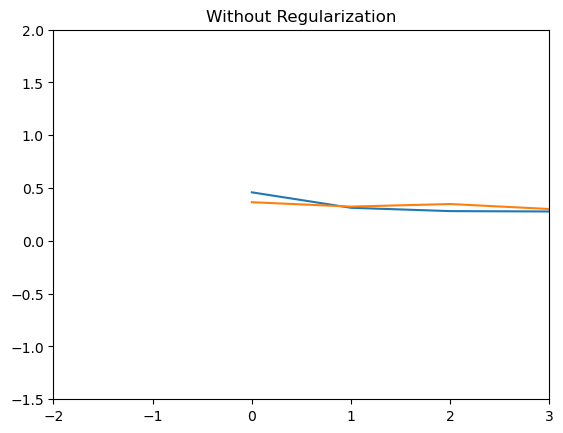

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 381us/step


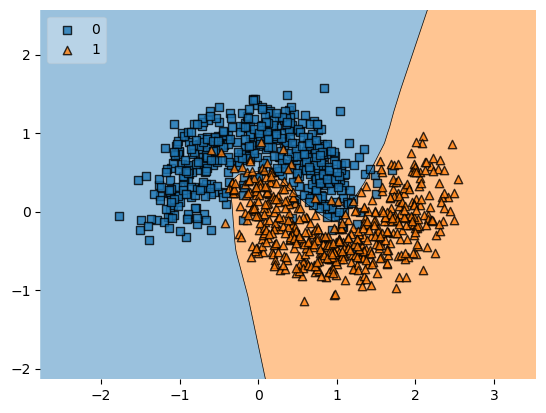

In [25]:
print('Best Accuracy: ', best_acc_wo_reg)
print('Best learning rate: ', best_lr_wo_reg)
plot_loss(history=best_hist_wo_reg, model=best_model_wo_reg, name="Without Regularization")

In [26]:
# With Regularization
best_model_reg = None
best_hist_reg = None
best_acc_reg = 0
best_lr_reg = 0
best_reg = None

for lr in learning_rate:
    for reg in regularizers_arr:
        model_reg = build_model(learning_rate=lr, regularizer=reg)
        hist = model_reg.fit(X,y,epochs=20, validation_split=0.2)
        acc = max(hist.history['accuracy'])
        if acc > best_acc_reg:
            best_acc_reg = acc
            best_hist_reg = hist
            best_lr_reg = lr
            best_model_reg = model_reg
            best_reg = reg           

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7646 - loss: 1.4327 - val_accuracy: 0.8000 - val_loss: 0.7684
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8800 - loss: 0.6365 - val_accuracy: 0.8400 - val_loss: 0.5707
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.5121 - val_accuracy: 0.8400 - val_loss: 0.5012
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8525 - loss: 0.4682 - val_accuracy: 0.8500 - val_loss: 0.4791
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.4520 - val_accuracy: 0.8500 - val_loss: 0.4656
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8692 - loss: 0.4397 - val_accuracy: 0.8450 - val_loss: 0.4591
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.4312 - val_accuracy: 0.8250 - val_loss: 0.4559
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8829 - loss: 0.4091 - val_accuracy: 0.8450 - val_los

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7517 - loss: 0.7060 - val_accuracy: 0.8000 - val_loss: 0.4883
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.4190 - val_accuracy: 0.8450 - val_loss: 0.4293
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8564 - loss: 0.3887 - val_accuracy: 0.8150 - val_loss: 0.3991
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3678 - val_accuracy: 0.8450 - val_loss: 0.3757
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8765 - loss: 0.3170 - val_accuracy: 0.8350 - val_loss: 0.3712
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8961 - loss: 0.3194 - val_accuracy: 0.8450 - val_loss: 0.4193
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8852 - loss: 0.3438 - val_accuracy: 0.8700 - val_loss: 0.3546
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8717 - loss: 0.3471 - val_accuracy: 0.8750 - val_loss:

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6708 - loss: 0.6964 - val_accuracy: 0.8050 - val_loss: 0.4466
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.4099 - val_accuracy: 0.8500 - val_loss: 0.3814
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8797 - loss: 0.3408 - val_accuracy: 0.8450 - val_loss: 0.3706
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - accuracy: 0.8629 - loss: 0.3554 - val_accuracy: 0.8500 - val_loss: 0.3591
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8897 - loss: 0.3016 - val_accuracy: 0.8450 - val_loss: 0.3642
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8988 - loss: 0.2884 - val_accuracy: 0.8500 - val_loss: 0.3441
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9147 - loss: 0.2771 - val_accuracy: 0.8700 - val_loss: 0.3203
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.2988 - val_accuracy: 0.8600 - val_los

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7454 - loss: 0.5404 - val_accuracy: 0.8050 - val_loss: 0.3861
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8598 - loss: 0.3406 - val_accuracy: 0.8400 - val_loss: 0.3409
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.3188 - val_accuracy: 0.8750 - val_loss: 0.3302
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8985 - loss: 0.2709 - val_accuracy: 0.8800 - val_loss: 0.2818
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9370 - loss: 0.2281 - val_accuracy: 0.8950 - val_loss: 0.2691
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9541 - loss: 0.1764 - val_accuracy: 0.9300 - val_loss: 0.2371
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9584 - loss: 0.1800 - val_accuracy: 0.9300 - val_loss: 0.2385
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9564 - loss: 0.1760 - val_accuracy: 0.9150 - val_los

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7733 - loss: 0.5169 - val_accuracy: 0.8200 - val_loss: 0.3549
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8714 - loss: 0.3103 - val_accuracy: 0.8500 - val_loss: 0.3436
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8738 - loss: 0.2931 - val_accuracy: 0.8300 - val_loss: 0.3107
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8899 - loss: 0.2638 - val_accuracy: 0.8450 - val_loss: 0.2958
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2301 - val_accuracy: 0.8750 - val_loss: 0.2582
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.9262 - loss: 0.2067 - val_accuracy: 0.8900 - val_loss: 0.2331
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.9296 - loss: 0.2084 - val_accuracy: 0.8850 - val_loss: 0.2323
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9326 - loss: 0.1700 - val_accuracy: 0.9100 - val_l

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7871 - loss: 0.5659 - val_accuracy: 0.8200 - val_loss: 0.3468
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8703 - loss: 0.2907 - val_accuracy: 0.8650 - val_loss: 0.3047
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8899 - loss: 0.2577 - val_accuracy: 0.8650 - val_loss: 0.2728
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9106 - loss: 0.2226 - val_accuracy: 0.8700 - val_loss: 0.2411
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 0.1804 - val_accuracy: 0.8950 - val_loss: 0.2410
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9477 - loss: 0.1530 - val_accuracy: 0.8950 - val_loss: 0.2326
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9378 - loss: 0.1682 - val_accuracy: 0.9150 - val_loss: 0.2156
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9364 - loss: 0.1883 - val_accuracy: 0.9050 - val_loss:

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6783 - loss: 0.5558 - val_accuracy: 0.8200 - val_loss: 0.3475
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.3041 - val_accuracy: 0.8450 - val_loss: 0.3279
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.2776 - val_accuracy: 0.8700 - val_loss: 0.2915
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9130 - loss: 0.2353 - val_accuracy: 0.8650 - val_loss: 0.2700
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9086 - loss: 0.2250 - val_accuracy: 0.8800 - val_loss: 0.2558
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9338 - loss: 0.1744 - val_accuracy: 0.9050 - val_loss: 0.2224
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9581 - loss: 0.1308 - val_accuracy: 0.9100 - val_loss: 0.2163
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.1311 - val_accuracy: 0.9050 - val_los

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7456 - loss: 0.5514 - val_accuracy: 0.8050 - val_loss: 0.3573
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8695 - loss: 0.3085 - val_accuracy: 0.8150 - val_loss: 0.3207
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.2765 - val_accuracy: 0.8450 - val_loss: 0.2957
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8953 - loss: 0.2204 - val_accuracy: 0.8450 - val_loss: 0.2802
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9047 - loss: 0.2400 - val_accuracy: 0.8550 - val_loss: 0.2452
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9324 - loss: 0.1972 - val_accuracy: 0.8850 - val_loss: 0.2241
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9396 - loss: 0.1631 - val_accuracy: 0.9000 - val_loss: 0.2286
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9441 - loss: 0.1695 - val_accuracy: 0.9000 - val_loss:

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7352 - loss: 1.5192 - val_accuracy: 0.8000 - val_loss: 1.0397
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.9061 - val_accuracy: 0.8050 - val_loss: 0.6929
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8511 - loss: 0.6276 - val_accuracy: 0.8150 - val_loss: 0.5652
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8658 - loss: 0.5177 - val_accuracy: 0.8300 - val_loss: 0.5161
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8887 - loss: 0.4421 - val_accuracy: 0.8400 - val_loss: 0.4974
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.4524 - val_accuracy: 0.8300 - val_loss: 0.4763
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.4318 - val_accuracy: 0.8300 - val_loss: 0.4689
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8789 - loss: 0.4224 - val_accuracy: 0.8400 - val_loss:

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8118 - loss: 0.7947 - val_accuracy: 0.8050 - val_loss: 0.5468
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.4839 - val_accuracy: 0.8300 - val_loss: 0.4565
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8687 - loss: 0.4156 - val_accuracy: 0.8550 - val_loss: 0.4188
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8727 - loss: 0.3707 - val_accuracy: 0.8500 - val_loss: 0.3997
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8787 - loss: 0.3588 - val_accuracy: 0.8450 - val_loss: 0.3891
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3494 - val_accuracy: 0.8500 - val_loss: 0.3826
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8728 - loss: 0.3681 - val_accuracy: 0.8600 - val_loss: 0.3778
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8716 - loss: 0.3585 - val_accuracy: 0.8550 - val_loss:

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8201 - loss: 0.6807 - val_accuracy: 0.8000 - val_loss: 0.4744
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8557 - loss: 0.4105 - val_accuracy: 0.8250 - val_loss: 0.4188
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3703 - val_accuracy: 0.8100 - val_loss: 0.4035
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8646 - loss: 0.3719 - val_accuracy: 0.8400 - val_loss: 0.3822
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.3394 - val_accuracy: 0.8450 - val_loss: 0.3696
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8824 - loss: 0.3315 - val_accuracy: 0.8600 - val_loss: 0.3632
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8870 - loss: 0.3172 - val_accuracy: 0.8550 - val_loss: 0.3389
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9049 - loss: 0.2859 - val_accuracy: 0.8650 - val_loss:

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_69 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7034 - loss: 0.6437 - val_accuracy: 0.7900 - val_loss: 0.4377
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.3659 - val_accuracy: 0.8300 - val_loss: 0.3628
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8599 - loss: 0.3382 - val_accuracy: 0.8300 - val_loss: 0.3524
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8712 - loss: 0.3196 - val_accuracy: 0.8500 - val_loss: 0.3298
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8861 - loss: 0.2904 - val_accuracy: 0.8650 - val_loss: 0.3115
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8972 - loss: 0.2679 - val_accuracy: 0.8750 - val_loss: 0.2896
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9042 - loss: 0.2588 - val_accuracy: 0.8750 - val_loss: 0.2732
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9243 - loss: 0.2132 - val_accuracy: 0.8800 - val_loss:

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5920 - loss: 0.6634 - val_accuracy: 0.7850 - val_loss: 0.4505
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8266 - loss: 0.4019 - val_accuracy: 0.7900 - val_loss: 0.3642
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8751 - loss: 0.3191 - val_accuracy: 0.8250 - val_loss: 0.3499
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.3321 - val_accuracy: 0.8300 - val_loss: 0.3308
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8875 - loss: 0.2790 - val_accuracy: 0.8400 - val_loss: 0.3189
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8955 - loss: 0.2619 - val_accuracy: 0.8650 - val_loss: 0.3037
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8906 - loss: 0.2605 - val_accuracy: 0.8600 - val_loss: 0.2839
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9068 - loss: 0.2278 - val_accuracy: 0.8700 - val_los

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_75 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8494 - loss: 0.5480 - val_accuracy: 0.8000 - val_loss: 0.3712
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.3293 - val_accuracy: 0.8350 - val_loss: 0.3299
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8934 - loss: 0.2603 - val_accuracy: 0.8500 - val_loss: 0.3145
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8761 - loss: 0.2669 - val_accuracy: 0.8550 - val_loss: 0.2934
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8767 - loss: 0.2657 - val_accuracy: 0.8650 - val_loss: 0.2821
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2251 - val_accuracy: 0.8750 - val_loss: 0.2625
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9216 - loss: 0.2061 - val_accuracy: 0.8700 - val_loss: 0.2485
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9192 - loss: 0.2107 - val_accuracy: 0.8800 - val_loss:

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8015 - loss: 0.5604 - val_accuracy: 0.7950 - val_loss: 0.3914
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8431 - loss: 0.3665 - val_accuracy: 0.8350 - val_loss: 0.3401
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8829 - loss: 0.2836 - val_accuracy: 0.8400 - val_loss: 0.3259
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8814 - loss: 0.2716 - val_accuracy: 0.8450 - val_loss: 0.3193
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8592 - loss: 0.2792 - val_accuracy: 0.8650 - val_loss: 0.3180
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8646 - loss: 0.2940 - val_accuracy: 0.8500 - val_loss: 0.3105
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8776 - loss: 0.2717 - val_accuracy: 0.8350 - val_loss: 0.3096
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8960 - loss: 0.2393 - val_accuracy: 0.8550 - val_los

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8037 - loss: 0.5872 - val_accuracy: 0.8000 - val_loss: 0.4284
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8602 - loss: 0.3719 - val_accuracy: 0.8250 - val_loss: 0.3443
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8687 - loss: 0.3015 - val_accuracy: 0.8350 - val_loss: 0.3255
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8612 - loss: 0.3048 - val_accuracy: 0.8500 - val_loss: 0.3087
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.8932 - loss: 0.2615 - val_accuracy: 0.8550 - val_loss: 0.2992
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8968 - loss: 0.2375 - val_accuracy: 0.8700 - val_loss: 0.2870
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8907 - loss: 0.2612 - val_accuracy: 0.8700 - val_loss: 0.2699
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9003 - loss: 0.2337 - val_accuracy: 0.8750 - val_los

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5500 - loss: 1.7055 - val_accuracy: 0.7450 - val_loss: 1.5621
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7884 - loss: 1.5204 - val_accuracy: 0.7500 - val_loss: 1.4102
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7934 - loss: 1.3735 - val_accuracy: 0.7600 - val_loss: 1.2770
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8162 - loss: 1.2298 - val_accuracy: 0.7650 - val_loss: 1.1552
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8340 - loss: 1.1087 - val_accuracy: 0.7750 - val_loss: 1.0474
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8504 - loss: 0.9935 - val_accuracy: 0.7850 - val_loss: 0.9517
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8625 - loss: 0.8876 - val_accuracy: 0.7950 - val_loss: 0.8671
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8292 - loss: 0.8359 - val_accuracy: 0.7950 - val_loss:

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_87 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7983 - loss: 0.8994 - val_accuracy: 0.8150 - val_loss: 0.8234
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.7956 - val_accuracy: 0.8050 - val_loss: 0.7350
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8482 - loss: 0.6992 - val_accuracy: 0.8100 - val_loss: 0.6628
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8578 - loss: 0.6286 - val_accuracy: 0.8050 - val_loss: 0.6024
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8464 - loss: 0.5733 - val_accuracy: 0.8150 - val_loss: 0.5591
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8640 - loss: 0.5278 - val_accuracy: 0.8150 - val_loss: 0.5292
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8611 - loss: 0.5088 - val_accuracy: 0.8200 - val_loss: 0.5060
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8667 - loss: 0.4663 - val_accuracy: 0.8200 - val_loss:

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5888 - loss: 0.7648 - val_accuracy: 0.7850 - val_loss: 0.6857
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.6649 - val_accuracy: 0.7900 - val_loss: 0.6063
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8169 - loss: 0.5822 - val_accuracy: 0.7850 - val_loss: 0.5381
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.5147 - val_accuracy: 0.7900 - val_loss: 0.4915
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8703 - loss: 0.4302 - val_accuracy: 0.8100 - val_loss: 0.4615
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8571 - loss: 0.4294 - val_accuracy: 0.8250 - val_loss: 0.4418
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.4092 - val_accuracy: 0.8200 - val_loss: 0.4296
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.3698 - val_accuracy: 0.8300 - val_loss:

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5093 - loss: 0.6614 - val_accuracy: 0.7850 - val_loss: 0.6021
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.5787 - val_accuracy: 0.8200 - val_loss: 0.5436
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8406 - loss: 0.5333 - val_accuracy: 0.8250 - val_loss: 0.4997
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8408 - loss: 0.4836 - val_accuracy: 0.8250 - val_loss: 0.4602
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8429 - loss: 0.4456 - val_accuracy: 0.8250 - val_loss: 0.4228
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8835 - loss: 0.3717 - val_accuracy: 0.8200 - val_loss: 0.3978
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3614 - val_accuracy: 0.8100 - val_loss: 0.3826
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8684 - loss: 0.3512 - val_accuracy: 0.8000 - val_loss:

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3849 - loss: 0.7192 - val_accuracy: 0.7400 - val_loss: 0.6642
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7481 - loss: 0.6538 - val_accuracy: 0.7600 - val_loss: 0.6140
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7931 - loss: 0.5971 - val_accuracy: 0.7600 - val_loss: 0.5656
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8111 - loss: 0.5423 - val_accuracy: 0.7650 - val_loss: 0.5108
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8189 - loss: 0.4824 - val_accuracy: 0.7800 - val_loss: 0.4647
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8321 - loss: 0.4268 - val_accuracy: 0.7800 - val_loss: 0.4276
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8604 - loss: 0.3698 - val_accuracy: 0.7850 - val_loss: 0.4007
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3590 - val_accuracy: 0.7950 - val_loss:

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_99 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4662 - loss: 0.6845 - val_accuracy: 0.5900 - val_loss: 0.6302
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 0.6064 - val_accuracy: 0.7600 - val_loss: 0.5679
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8243 - loss: 0.5391 - val_accuracy: 0.7750 - val_loss: 0.5147
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8265 - loss: 0.4768 - val_accuracy: 0.7800 - val_loss: 0.4677
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8528 - loss: 0.4190 - val_accuracy: 0.7850 - val_loss: 0.4252
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.3801 - val_accuracy: 0.8000 - val_loss: 0.3909
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8572 - loss: 0.3517 - val_accuracy: 0.8150 - val_loss: 0.3677
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8666 - loss: 0.3097 - val_accuracy: 0.8150 - val_loss:

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_102 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6241 - loss: 0.6461 - val_accuracy: 0.7750 - val_loss: 0.6009
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8197 - loss: 0.5886 - val_accuracy: 0.7800 - val_loss: 0.5448
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8197 - loss: 0.5249 - val_accuracy: 0.7950 - val_loss: 0.4823
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8348 - loss: 0.4575 - val_accuracy: 0.7900 - val_loss: 0.4303
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8269 - loss: 0.4046 - val_accuracy: 0.8000 - val_loss: 0.3909
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.3726 - val_accuracy: 0.8050 - val_loss: 0.3645
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.3408 - val_accuracy: 0.8200 - val_loss: 0.3478
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.3259 - val_accuracy: 0.8250 - val_loss:

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5235 - loss: 0.7028 - val_accuracy: 0.7250 - val_loss: 0.6483
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8221 - loss: 0.6186 - val_accuracy: 0.7800 - val_loss: 0.5814
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8507 - loss: 0.5498 - val_accuracy: 0.7950 - val_loss: 0.5145
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8748 - loss: 0.4737 - val_accuracy: 0.7900 - val_loss: 0.4547
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8863 - loss: 0.3952 - val_accuracy: 0.8150 - val_loss: 0.4054
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8718 - loss: 0.3699 - val_accuracy: 0.8200 - val_loss: 0.3686
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8681 - loss: 0.3172 - val_accuracy: 0.8350 - val_loss: 0.3458
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8759 - loss: 0.3032 - val_accuracy: 0.8550 - val_loss:

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4666 - loss: 1.7165 - val_accuracy: 0.5450 - val_loss: 1.6813
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4732 - loss: 1.6878 - val_accuracy: 0.5350 - val_loss: 1.6633
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4835 - loss: 1.6699 - val_accuracy: 0.5150 - val_loss: 1.6450
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4836 - loss: 1.6499 - val_accuracy: 0.5400 - val_loss: 1.6264
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4785 - loss: 1.6400 - val_accuracy: 0.5650 - val_loss: 1.6087
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5416 - loss: 1.6049 - val_accuracy: 0.6350 - val_loss: 1.5916
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6474 - loss: 1.5913 - val_accuracy: 0.7350 - val_loss: 1.5749
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7526 - loss: 1.5770 - val_accuracy: 0.7550 - val_loss:

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_111 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1224 - loss: 0.9712 - val_accuracy: 0.2050 - val_loss: 0.9586
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1416 - loss: 0.9606 - val_accuracy: 0.2550 - val_loss: 0.9484
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1857 - loss: 0.9498 - val_accuracy: 0.3800 - val_loss: 0.9380
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3490 - loss: 0.9401 - val_accuracy: 0.4800 - val_loss: 0.9271
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4221 - loss: 0.9278 - val_accuracy: 0.5050 - val_loss: 0.9156
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4513 - loss: 0.9145 - val_accuracy: 0.5150 - val_loss: 0.9041
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4753 - loss: 0.9028 - val_accuracy: 0.5700 - val_loss: 0.8928
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5528 - loss: 0.8932 - val_accuracy: 0.7350 - val_loss:

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_114 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5491 - loss: 0.8035 - val_accuracy: 0.5000 - val_loss: 0.8114
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5412 - loss: 0.7938 - val_accuracy: 0.5300 - val_loss: 0.8015
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6062 - loss: 0.7791 - val_accuracy: 0.5350 - val_loss: 0.7920
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6469 - loss: 0.7705 - val_accuracy: 0.5600 - val_loss: 0.7827
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6551 - loss: 0.7677 - val_accuracy: 0.6000 - val_loss: 0.7737
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6843 - loss: 0.7509 - val_accuracy: 0.6100 - val_loss: 0.7649
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6982 - loss: 0.7451 - val_accuracy: 0.6300 - val_loss: 0.7562
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7070 - loss: 0.7373 - val_accuracy: 0.6500 - val_loss:

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_117 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3319 - loss: 0.7461 - val_accuracy: 0.3500 - val_loss: 0.7374
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4203 - loss: 0.7215 - val_accuracy: 0.4050 - val_loss: 0.7233
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5060 - loss: 0.7097 - val_accuracy: 0.6150 - val_loss: 0.7088
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6958 - loss: 0.6950 - val_accuracy: 0.6900 - val_loss: 0.6959
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7426 - loss: 0.6824 - val_accuracy: 0.7300 - val_loss: 0.6830
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8281 - loss: 0.6670 - val_accuracy: 0.7600 - val_loss: 0.6712
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8353 - loss: 0.6550 - val_accuracy: 0.7750 - val_loss: 0.6597
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.6425 - val_accuracy: 0.7800 - val_loss:

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5077 - loss: 0.7030 - val_accuracy: 0.5400 - val_loss: 0.6890
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 0.6921 - val_accuracy: 0.5300 - val_loss: 0.6790
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4656 - loss: 0.6822 - val_accuracy: 0.5200 - val_loss: 0.6693
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4621 - loss: 0.6779 - val_accuracy: 0.5800 - val_loss: 0.6597
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5595 - loss: 0.6612 - val_accuracy: 0.6050 - val_loss: 0.6501
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6315 - loss: 0.6453 - val_accuracy: 0.6400 - val_loss: 0.6403
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6695 - loss: 0.6351 - val_accuracy: 0.6650 - val_loss: 0.6306
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6795 - loss: 0.6302 - val_accuracy: 0.6850 - val_loss:

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_123 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4710 - loss: 0.7089 - val_accuracy: 0.5100 - val_loss: 0.6948
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5367 - loss: 0.6923 - val_accuracy: 0.5700 - val_loss: 0.6832
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6224 - loss: 0.6801 - val_accuracy: 0.6400 - val_loss: 0.6717
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6879 - loss: 0.6710 - val_accuracy: 0.7300 - val_loss: 0.6607
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7445 - loss: 0.6592 - val_accuracy: 0.7800 - val_loss: 0.6497
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8036 - loss: 0.6486 - val_accuracy: 0.7900 - val_loss: 0.6393
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8218 - loss: 0.6352 - val_accuracy: 0.8000 - val_loss: 0.6293
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8199 - loss: 0.6289 - val_accuracy: 0.7950 - val_loss:

Model: "sequential_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_126 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_127 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5431 - loss: 0.6984 - val_accuracy: 0.4900 - val_loss: 0.7001
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5384 - loss: 0.6925 - val_accuracy: 0.4950 - val_loss: 0.6943
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5157 - loss: 0.6900 - val_accuracy: 0.5050 - val_loss: 0.6885
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5858 - loss: 0.6797 - val_accuracy: 0.5350 - val_loss: 0.6824
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6203 - loss: 0.6764 - val_accuracy: 0.5650 - val_loss: 0.6767
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6341 - loss: 0.6713 - val_accuracy: 0.6150 - val_loss: 0.6712
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6863 - loss: 0.6646 - val_accuracy: 0.6500 - val_loss: 0.6661
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7426 - loss: 0.6578 - val_accuracy: 0.6950 - val_loss:

Model: "sequential_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2156 - loss: 0.7278 - val_accuracy: 0.2450 - val_loss: 0.7205
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2345 - loss: 0.7194 - val_accuracy: 0.2700 - val_loss: 0.7130
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2377 - loss: 0.7124 - val_accuracy: 0.2950 - val_loss: 0.7057
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2625 - loss: 0.7039 - val_accuracy: 0.3650 - val_loss: 0.6985
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3512 - loss: 0.6988 - val_accuracy: 0.4850 - val_loss: 0.6915
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4371 - loss: 0.6919 - val_accuracy: 0.5650 - val_loss: 0.6846
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5560 - loss: 0.6843 - val_accuracy: 0.6850 - val_loss: 0.6774
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6794 - loss: 0.6759 - val_accuracy: 0.7350 - val_loss:

Best Accuracy:  0.9612500071525574
Best learning rate:  0.005
Regularizer used is L2
Lambda value:  0.0001


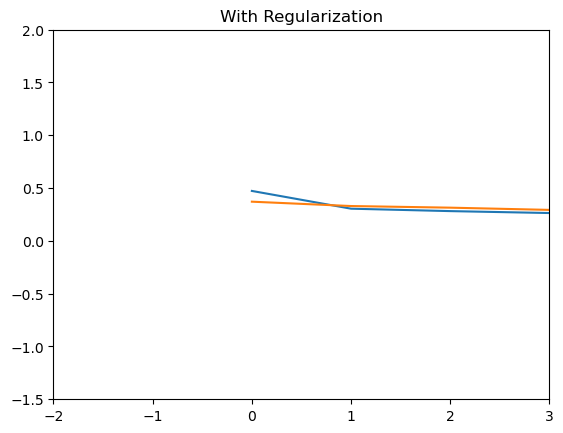

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 409us/step


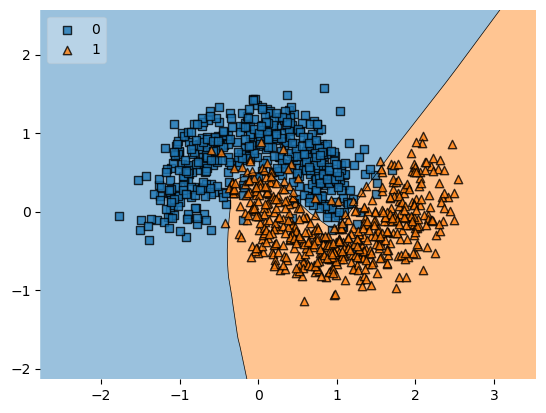

In [28]:
print('Best Accuracy: ', best_acc_reg)
print('Best learning rate: ', best_lr_reg)
if isinstance(best_reg, regularizers.L1):
    lambda_value = best_reg.l1
    print('Regularizer used is L1')
    print('Lambda value: ', lambda_value)
else:
    lambda_value = best_reg.l2
    print('Regularizer used is L2')
    print('Lambda value: ', lambda_value)

plot_loss(history=best_hist_reg, model=best_model_reg, name="With Regularization")

In [ ]:
0.9624999761581421